In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_theme()
FONT_SIZE = 18
plt.rc('font', size=FONT_SIZE)
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)
plt.rc('xtick', labelsize=FONT_SIZE - 4)
plt.rc('ytick', labelsize=FONT_SIZE - 4)

In [2]:
raw_data = pd.read_csv("2020-2022vs2019_Seated_Diner_Data.csv").transpose()
display(raw_data[77].head())
display(raw_data[74].head())

def load_city(column):
    city = raw_data[column].dropna().iloc[1:]
    city.index = pd.to_datetime(city.index)
    # Convert to float, % sales instead of % sales decline
    return city.apply(lambda per: float(per[:-1]) + 100)

cambridge = load_city(77)
display(cambridge)
boston = load_city(74)
display(boston)

Unnamed: 0    Cambridge (US)
2020/2/18                NaN
2020/2/19                NaN
2020/2/20                NaN
2020/2/21                NaN
Name: 77, dtype: object

Unnamed: 0    Boston
2020/2/18         5%
2020/2/19        15%
2020/2/20        -3%
2020/2/21       -12%
Name: 74, dtype: object

2020-11-09    12.80
2020-11-10    21.36
2020-11-11    16.48
2020-11-12    14.14
2020-11-13    19.65
              ...  
2022-02-19    69.50
2022-02-20    78.56
2022-02-21    81.01
2022-02-22    41.15
2022-02-23    64.16
Name: 77, Length: 470, dtype: float64

2020-02-18    105.00
2020-02-19    115.00
2020-02-20     97.00
2020-02-21     88.00
2020-02-22     98.00
               ...  
2022-02-19     89.53
2022-02-20    141.31
2022-02-21    140.60
2022-02-22     62.43
2022-02-23     86.09
Name: 74, Length: 735, dtype: float64

In [3]:
def plot_series(data, title, ylabel, ylim=None):
    plt.figure(figsize=(15,5))
    ax = sns.lineplot(data=data)
    ax.set_title(title)
    ax.set(ylabel=ylabel)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
    if ylim:
        ax.set_ylim(ylim)
    plt.axvline(x=datetime(2021, 10, 28), linestyle=":", label="Peak")
    plt.show()

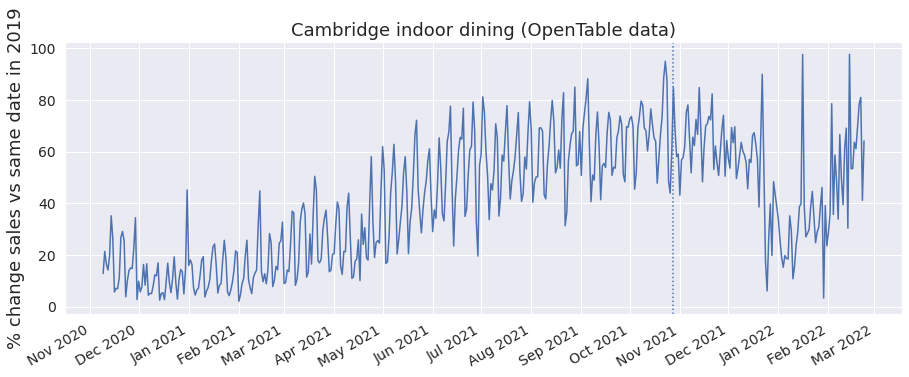

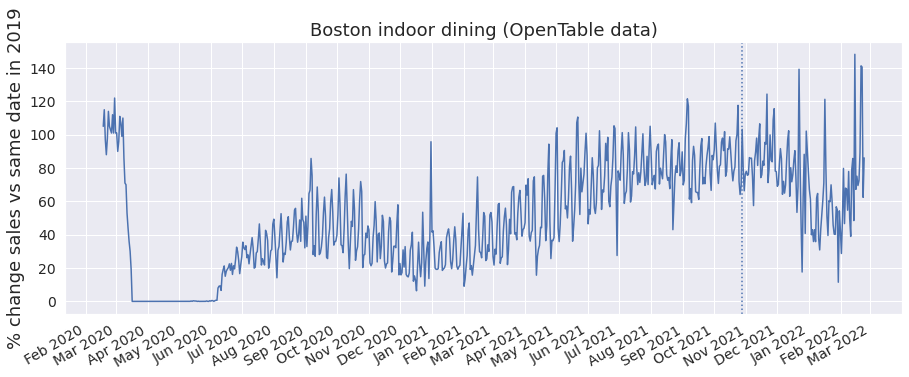

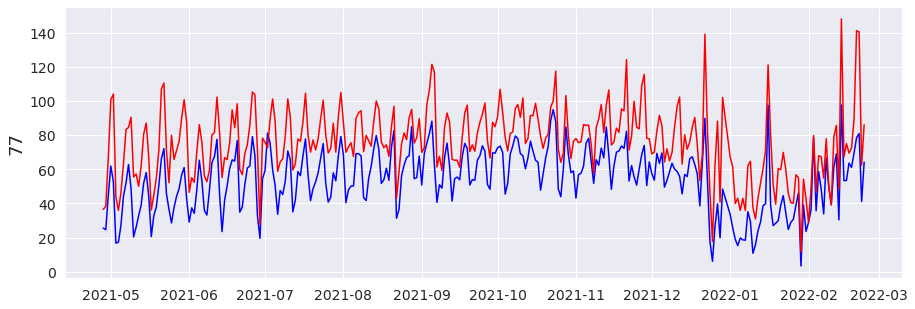

In [4]:
plot_series(cambridge, "Cambridge indoor dining (OpenTable data)", ylabel="% change sales vs same date in 2019")
plot_series(boston, "Boston indoor dining (OpenTable data)", ylabel="% change sales vs same date in 2019")
plt.figure(figsize=(15,5))
sns.lineplot(data=cambridge.iloc[-300:], color="blue")
sns.lineplot(data=boston.iloc[-300:], color="red")
plt.show()

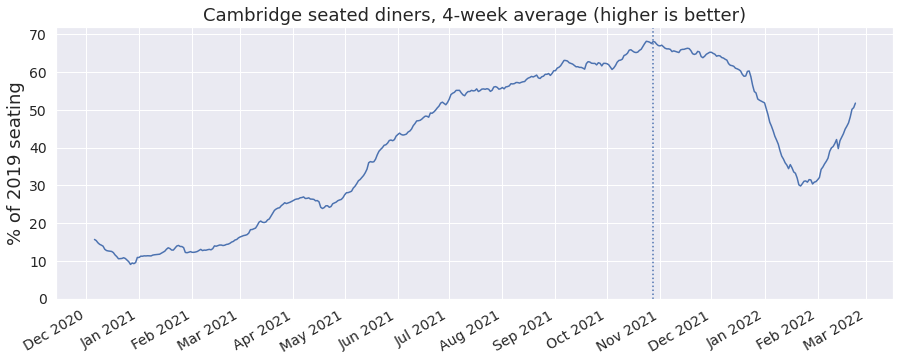

In [5]:
cambridge_28dayaverage = cambridge.rolling(window=28).mean()
plot_series(cambridge_28dayaverage, "Cambridge seated diners, 4-week average (higher is better)", ylabel="% of 2019 seating", ylim=[0, 72])

In [6]:
covid_cases = pd.read_csv("ma-covid-cases.csv", parse_dates=["Date"])
covid_cases = covid_cases.set_index("Date")

new_covid_cases = (covid_cases["Positive New"] + covid_cases["Probable New"]).dropna()

# Same starting date as restaurant data:
new_covid_cases = new_covid_cases.iloc[68:]
display(new_covid_cases)

# Fill in missing dates (e.g. weekends) with zeros:
complete_index = pd.date_range(new_covid_cases.index.values[0], new_covid_cases.index.values[-1])
new_covid_cases = new_covid_cases.reindex(complete_index, fill_value=0)

new_covid_cases

Date
2020-11-09    1328.0
2020-11-10    2154.0
2020-11-11    2660.0
2020-11-12    2648.0
2020-11-13    2906.0
               ...  
2022-02-17    2663.0
2022-02-18    2131.0
2022-02-22    4380.0
2022-02-23    1036.0
2022-02-24    1620.0
Length: 393, dtype: float64

2020-11-09    1328.0
2020-11-10    2154.0
2020-11-11    2660.0
2020-11-12    2648.0
2020-11-13    2906.0
               ...  
2022-02-20       0.0
2022-02-21       0.0
2022-02-22    4380.0
2022-02-23    1036.0
2022-02-24    1620.0
Freq: D, Length: 473, dtype: float64

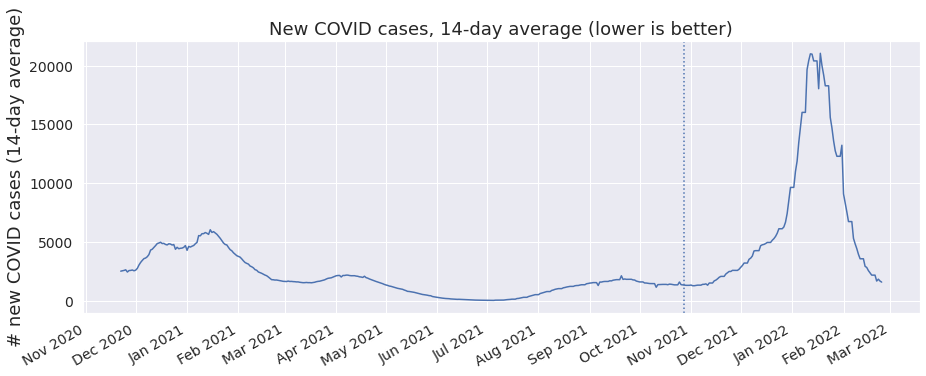

In [7]:
new_covid_14dayaverage = new_covid_cases.rolling(window=14).mean()
plot_series(new_covid_14dayaverage, "New COVID cases, 14-day average (lower is better)", ylabel="# new COVID cases (14-day average)")

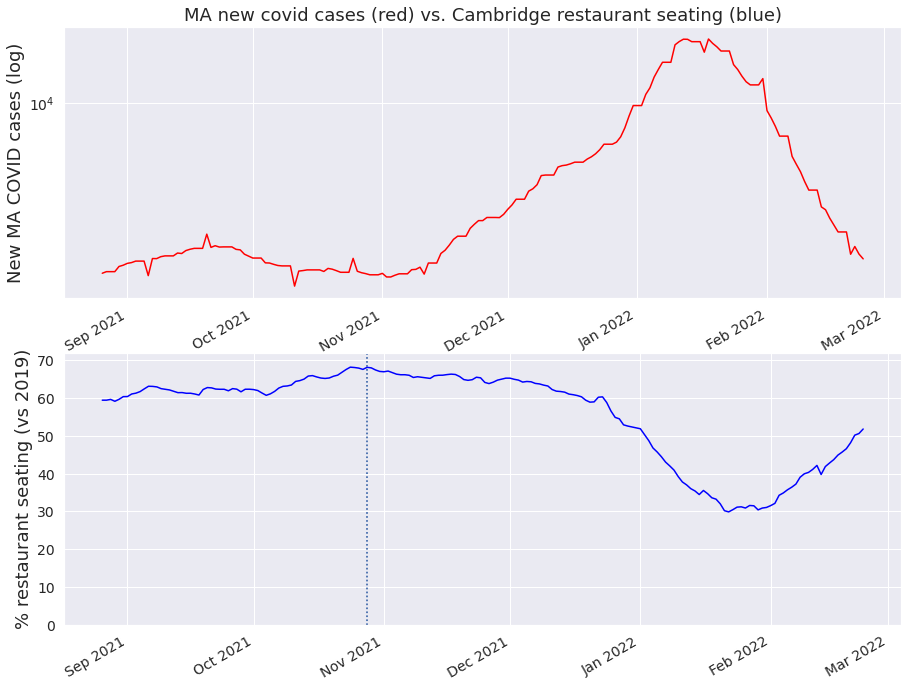

In [8]:
fig, axs = plt.subplots(2, figsize=(15,11))
plt.axvline(x=datetime(2021, 10, 28), linestyle=":")
ax = sns.lineplot(data=cambridge_28dayaverage.iloc[290:], color="blue", ax=axs[1])
ax.set_ylim([0, 72])
ax2 = sns.lineplot(data=new_covid_14dayaverage.iloc[290:], color="red", ax=axs[0])
ax2.set_title("MA new covid cases (red) vs. Cambridge restaurant seating (blue)")
ax.set(ylabel="% restaurant seating (vs 2019)")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
for label in ax2.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax2.set(ylabel="New MA COVID cases (log)", yscale="log")
ax.xaxis.set_major_locator(mdates.MonthLocator())
from datetime import datetime
plt.axvline(x=datetime(2021, 10, 28), linestyle=":")
plt.show()

In [9]:
print(new_covid_14dayaverage[datetime(2021,11,1)])
print(new_covid_14dayaverage[datetime(2021,12,1)])

1352.0
2864.3571428571427
